We want to analyze smart device usage data in order to gain insight into how consumers use non-Bellabeat smart
devices. 

We attempt to answer the following questions in this study.

1. What are some usage patterns for smart devices?
2. How may Bellabeat customers be influenced by these trends?
3. How can these developments affect Bellabeat's marketing plan?

The data we are working on can be found [here](https://www.kaggle.com/datasets/arashnic/fitbit).



The dataset includes minute-level output for heart rate, physical activity, and sleep monitoring from $33$ Fitbit users who gave their consent to share their personal tracker data. 
The dataset contains data on heart rate, steps taken, and daily activity that can be used to examine users' routines.

Each of the $18$ csv files in the dataset contains consumer information. The long formart is used to store data. The data was collected on an hourly, weekly, and monthly basis.

#### The ROCCC parameters: ####

Is data **Reliable**? : Since only $33$ users' data were collected, the data source is unreliable, because it only represents part of the population. Therefore, the outcomes are subject to bias.

Is data **Original**?: Data is obtained from a survey on Amazon Mechanical Turk, and hence it cannot be considered original, because they are second or third-party data.

Is data **Comprehensive**?: There is some essential missing information about the users, such as age, gender, and height. This lack of information could lead to less accurate conclusions.

Is data **Current**?: Data is from $2016$, and therefore, not up-to-date.

Is data **Cited**?: Data is not cited. Only the name of the survey appears.

There are only $33$ users in the data set, and these users consented to share their data. However, this volunteer sampling is subject to bias because only those comfortable sharing their data have done so. Therefore, this dataset needs to represent better the population that Bellabeat aims to target.

## Loading libraries and datasets 🚛 🚜

In [2]:
# Load required libraries
library(ggplot2)
library(dplyr)
library(lubridate)
library(readr)
library(Hmisc)
library(janitor)
library(hrbrthemes)
library(corrplot)
library(correlation)
library(gridExtra)
library(reshape)

options(dplyr.summarise.inform = FALSE)
options(warn=-1)

In [3]:
# Create a path for directory
dir_path <- '/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/'

# Load datasets
daily_data <- read_csv(paste0(dir_path,'dailyActivity_merged.csv'), show_col_types=FALSE)
sleep_data <- read_csv(paste0(dir_path,'sleepDay_merged.csv'), show_col_types=FALSE)
weight_data <- read_csv(paste0(dir_path,'weightLogInfo_merged.csv'), show_col_types=FALSE)
hr_data <- read_csv(paste0(dir_path,'heartrate_seconds_merged.csv'), show_col_types=FALSE)

In [4]:
glimpse(daily_data)

Rows: 940
Columns: 15
$ Id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ ActivityDate             <chr> "4/12/2016", "4/13/2016", "4/14/2016", "4/15/…
$ TotalSteps               <dbl> 13162, 10735, 10460, 9762, 12669, 9705, 13019…
$ TotalDistance            <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ TrackerDistance          <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ LoggedActivitiesDistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveDistance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, 3.5…
$ ModeratelyActiveDistance <dbl> 0.55, 0.69, 0.40, 1.26, 0.41, 0.78, 0.64, 1.3…
$ LightActiveDistance      <dbl> 6.06, 4.71, 3.91, 2.83, 5.04, 2.51, 4.71, 5.0…
$ SedentaryActiveDistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveMinutes        <dbl> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66, 4…
$ FairlyActiveMinutes      <dbl> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27, 21…
$ LightlyActiveMin

In [4]:
glimpse(sleep_data)

Rows: 413
Columns: 5
$ Id                 <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 150…
$ SleepDay           <chr> "4/12/2016 12:00:00 AM", "4/13/2016 12:00:00 AM", "…
$ TotalSleepRecords  <dbl> 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ TotalMinutesAsleep <dbl> 327, 384, 412, 340, 700, 304, 360, 325, 361, 430, 2…
$ TotalTimeInBed     <dbl> 346, 407, 442, 367, 712, 320, 377, 364, 384, 449, 3…


In [5]:
glimpse(weight_data)

Rows: 67
Columns: 8
$ Id             <dbl> 1503960366, 1503960366, 1927972279, 2873212765, 2873212…
$ Date           <chr> "5/2/2016 11:59:59 PM", "5/3/2016 11:59:59 PM", "4/13/2…
$ WeightKg       <dbl> 52.6, 52.6, 133.5, 56.7, 57.3, 72.4, 72.3, 69.7, 70.3, …
$ WeightPounds   <dbl> 115.9631, 115.9631, 294.3171, 125.0021, 126.3249, 159.6…
$ Fat            <dbl> 22, NA, NA, NA, NA, 25, NA, NA, NA, NA, NA, NA, NA, NA,…
$ BMI            <dbl> 22.65, 22.65, 47.54, 21.45, 21.69, 27.45, 27.38, 27.25,…
$ IsManualReport <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, …
$ LogId          <dbl> 1.462234e+12, 1.462320e+12, 1.460510e+12, 1.461283e+12,…


In [6]:
glimpse(hr_data)

Rows: 2,483,658
Columns: 3
$ Id    <dbl> 2022484408, 2022484408, 2022484408, 2022484408, 2022484408, 2022…
$ Time  <chr> "4/12/2016 7:21:00 AM", "4/12/2016 7:21:05 AM", "4/12/2016 7:21:…
$ Value <dbl> 97, 102, 105, 103, 101, 95, 91, 93, 94, 93, 92, 89, 83, 61, 60, …


## Some Cleaning 🧹🧽 🪣

In [5]:
# Clean column names
daily_data <- clean_names(daily_data)
sleep_data <- clean_names(sleep_data)
weight_data <- clean_names(weight_data)
hr_data <- clean_names(hr_data)

In [6]:
# Change the character type to date or data/time data
daily_data$activity_date <- mdy(daily_data$activity_date)
sleep_data$sleep_day <- mdy_hms(sleep_data$sleep_day)
weight_data$date <- mdy_hms(weight_data$date)
hr_data$time <- mdy_hms(hr_data$time)

In [7]:
# Check duplicated rows
sleep_data[duplicated(sleep_data),]

id,sleep_day,total_sleep_records,total_minutes_asleep,total_time_in_bed
<dbl>,<dttm>,<dbl>,<dbl>,<dbl>
4388161847,2016-05-05,1,471,495
4702921684,2016-05-07,1,520,543
8378563200,2016-04-25,1,388,402


In [8]:
# Remove duplicated rows
sleep_data <- sleep_data[!duplicated(sleep_data), ]

In [9]:
# Look for missing values
cat('daily_data includes NA values:', any(is.na(daily_data)==TRUE), '\n')
cat('weight_data includes NA values:', any(is.na(weight_data)==TRUE), '\n')
cat('sleep_data includes NA values:', any(is.na(sleep_data)==TRUE), '\n')
cat('hr_data includes NA values:', any(is.na(hr_data)==TRUE))

daily_data includes NA values: FALSE 
weight_data includes NA values: TRUE 
sleep_data includes NA values: FALSE 
hr_data includes NA values: FALSE

Weight-data contains missing values. We look at the percentage of missing values in each column in the weight_data dataframe.

In [10]:
colSums(is.na(weight_data))/nrow(weight_data)

id             date        weight_kg    weight_pounds 
       0.0000000        0.0000000        0.0000000        0.0000000 
             fat              bmi is_manual_report           log_id 
       0.9701493        0.0000000        0.0000000        0.0000000

In [10]:
# Remove the "fat" column from weight_data
weight_data <- weight_data %>% select(-fat)

## Anlasys of Data 🧐 

In [11]:
cat('number of users who shared their daily activity =', length(unique(daily_data$id)), '\n')
cat('number of users who shared their sleep activity =', length(unique(sleep_data$id)), '\n')
cat('number of users who shared their weight data =',length(unique(weight_data$id)), '\n')
cat('number of users who shared their heart rate data =',length(unique(hr_data$id)))

number of users who shared their daily activity = 33 
number of users who shared their sleep activity = 24 
number of users who shared their weight data = 8 
number of users who shared their heart rate data = 14

In [12]:
# Create a function for plot size
plot_size <- function(width, height, ...){
    options(repr.plot.width = width, repr.plot.height = height)
    }

#  Customize hist() function to change colors
hist.data.frame <- function(x, ..., colors = rainbow(ncol(x))) {
  col <- 1
  hist <- function(...) {
    graphics::hist(..., col = colors[col])
    col <<- col + 1
  }
  f <- Hmisc:::hist.data.frame
  environment(f) <- environment()
  f(x, ...)
}

Daily Activity Data:

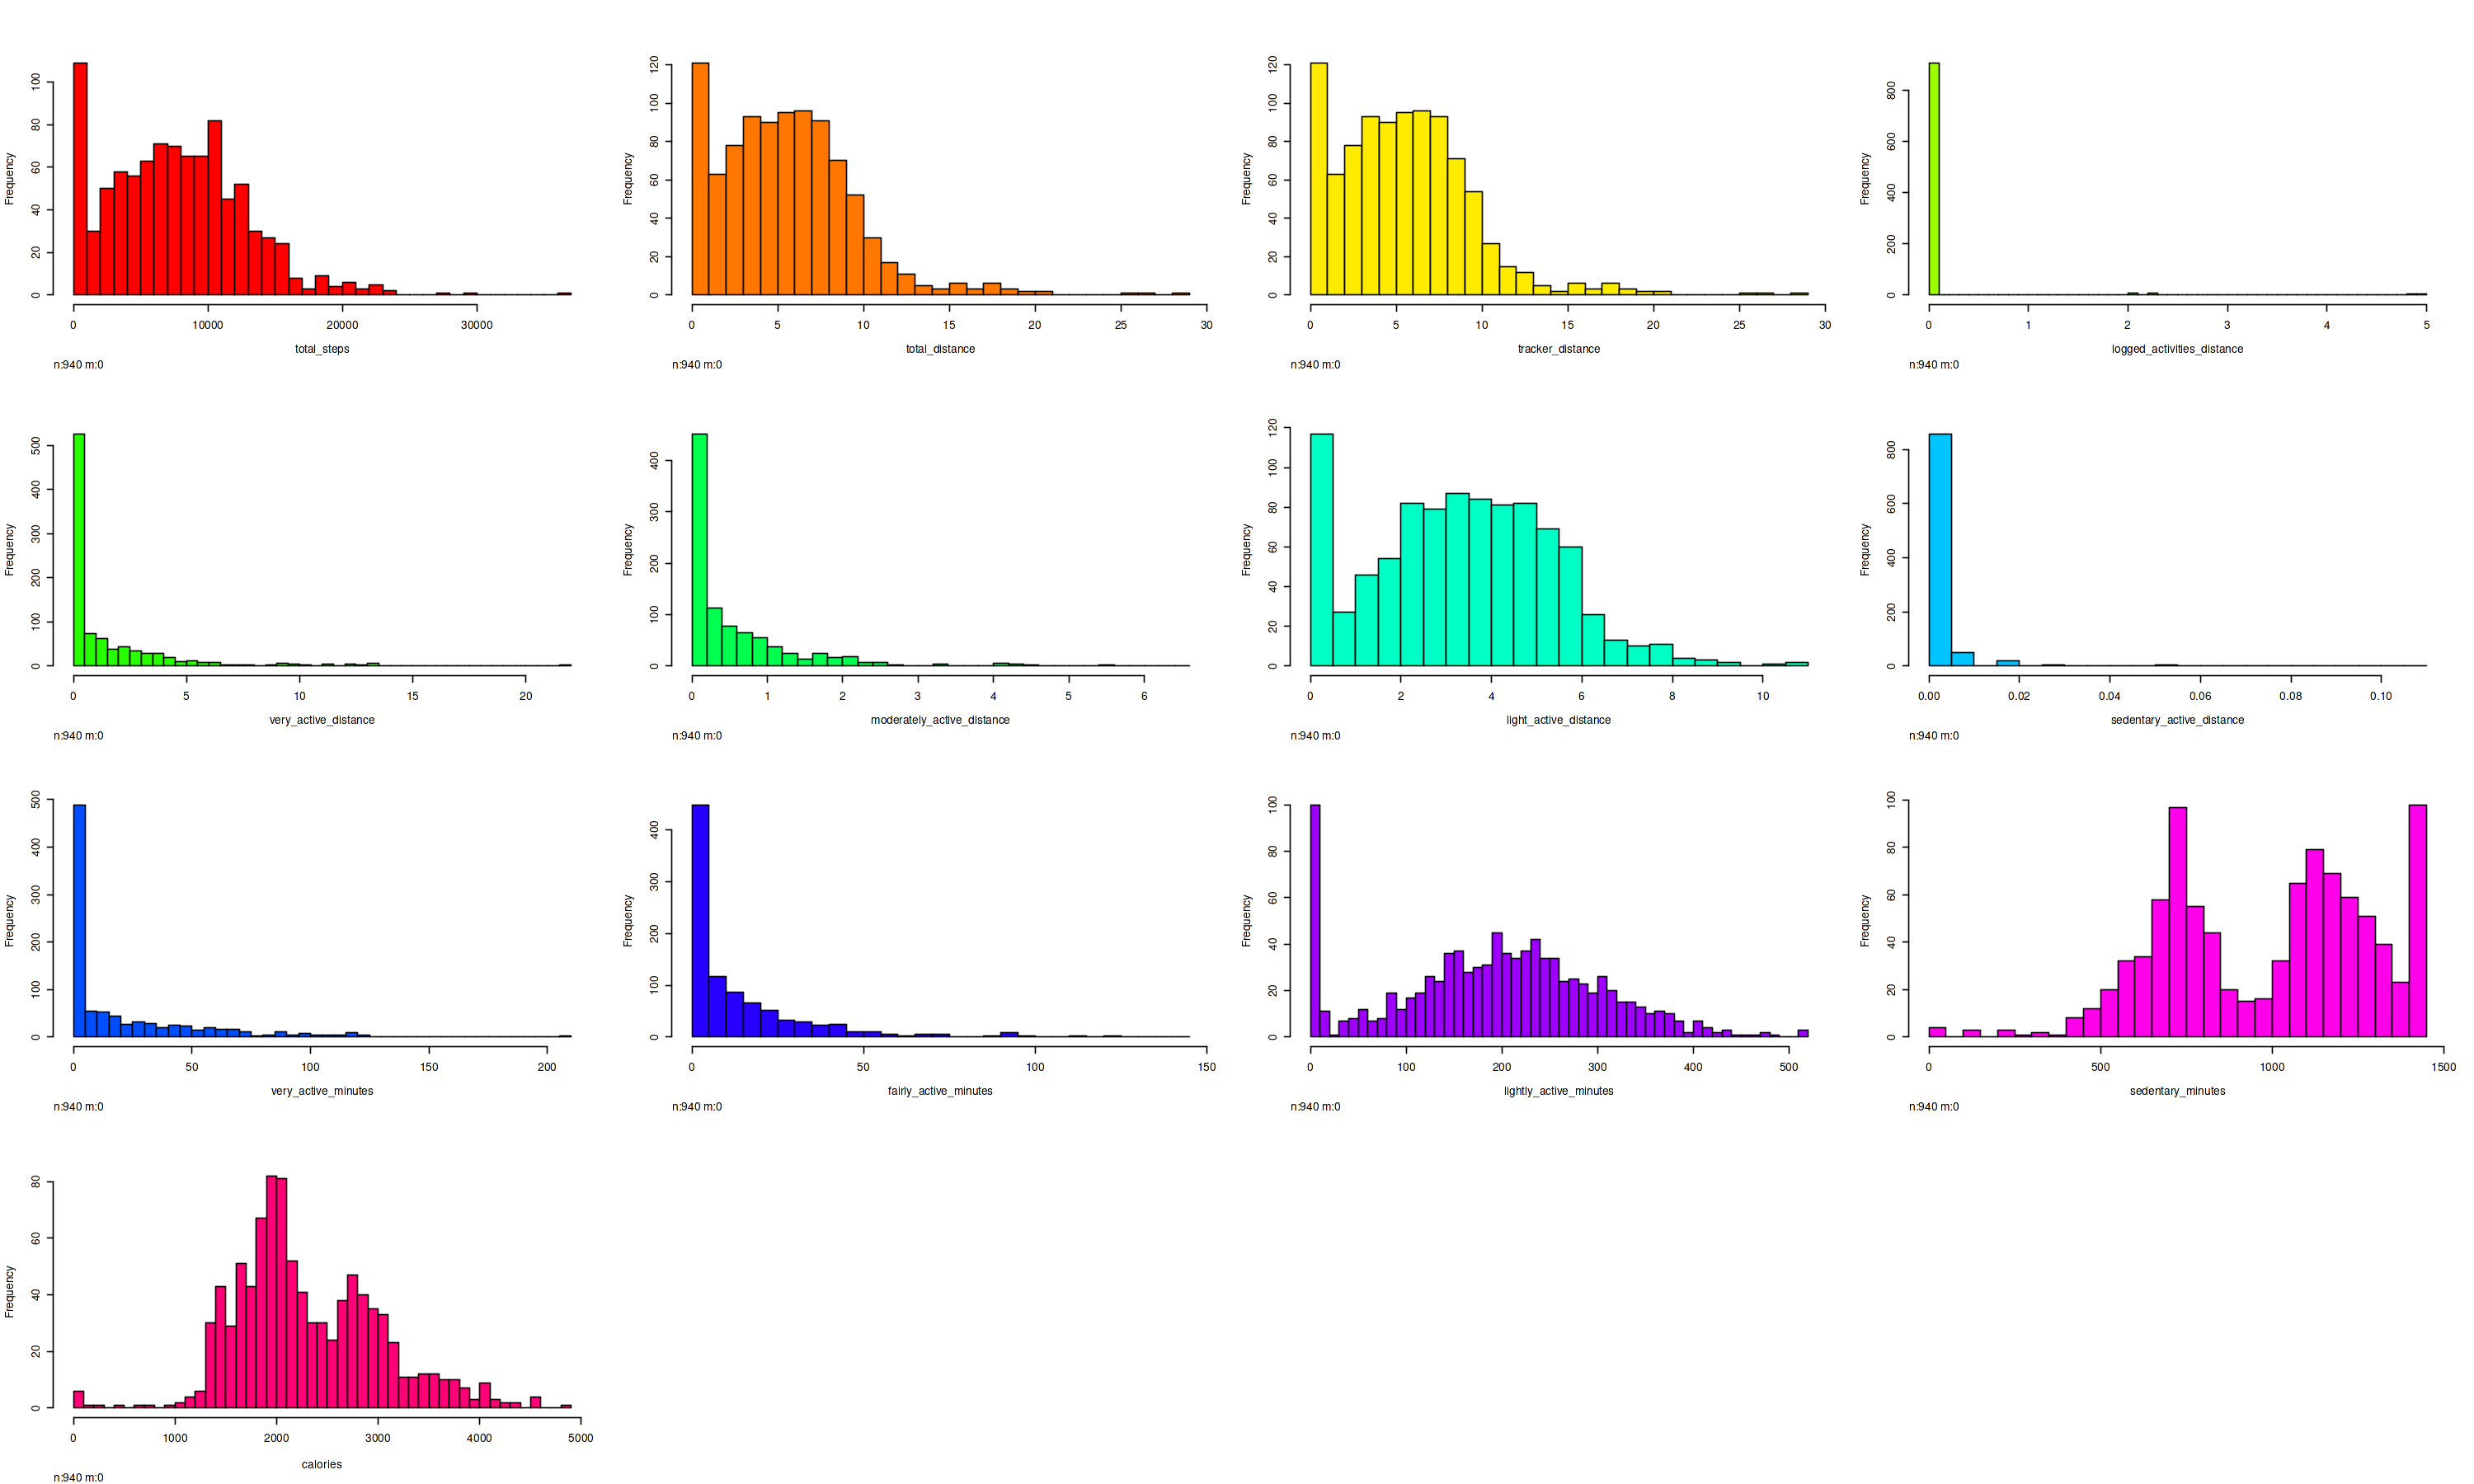

In [13]:
plot_size(25,15)
hist(daily_data[,-c(1,2)], main=hi)
cat('Daily Activity Data:')

Sleep Data:

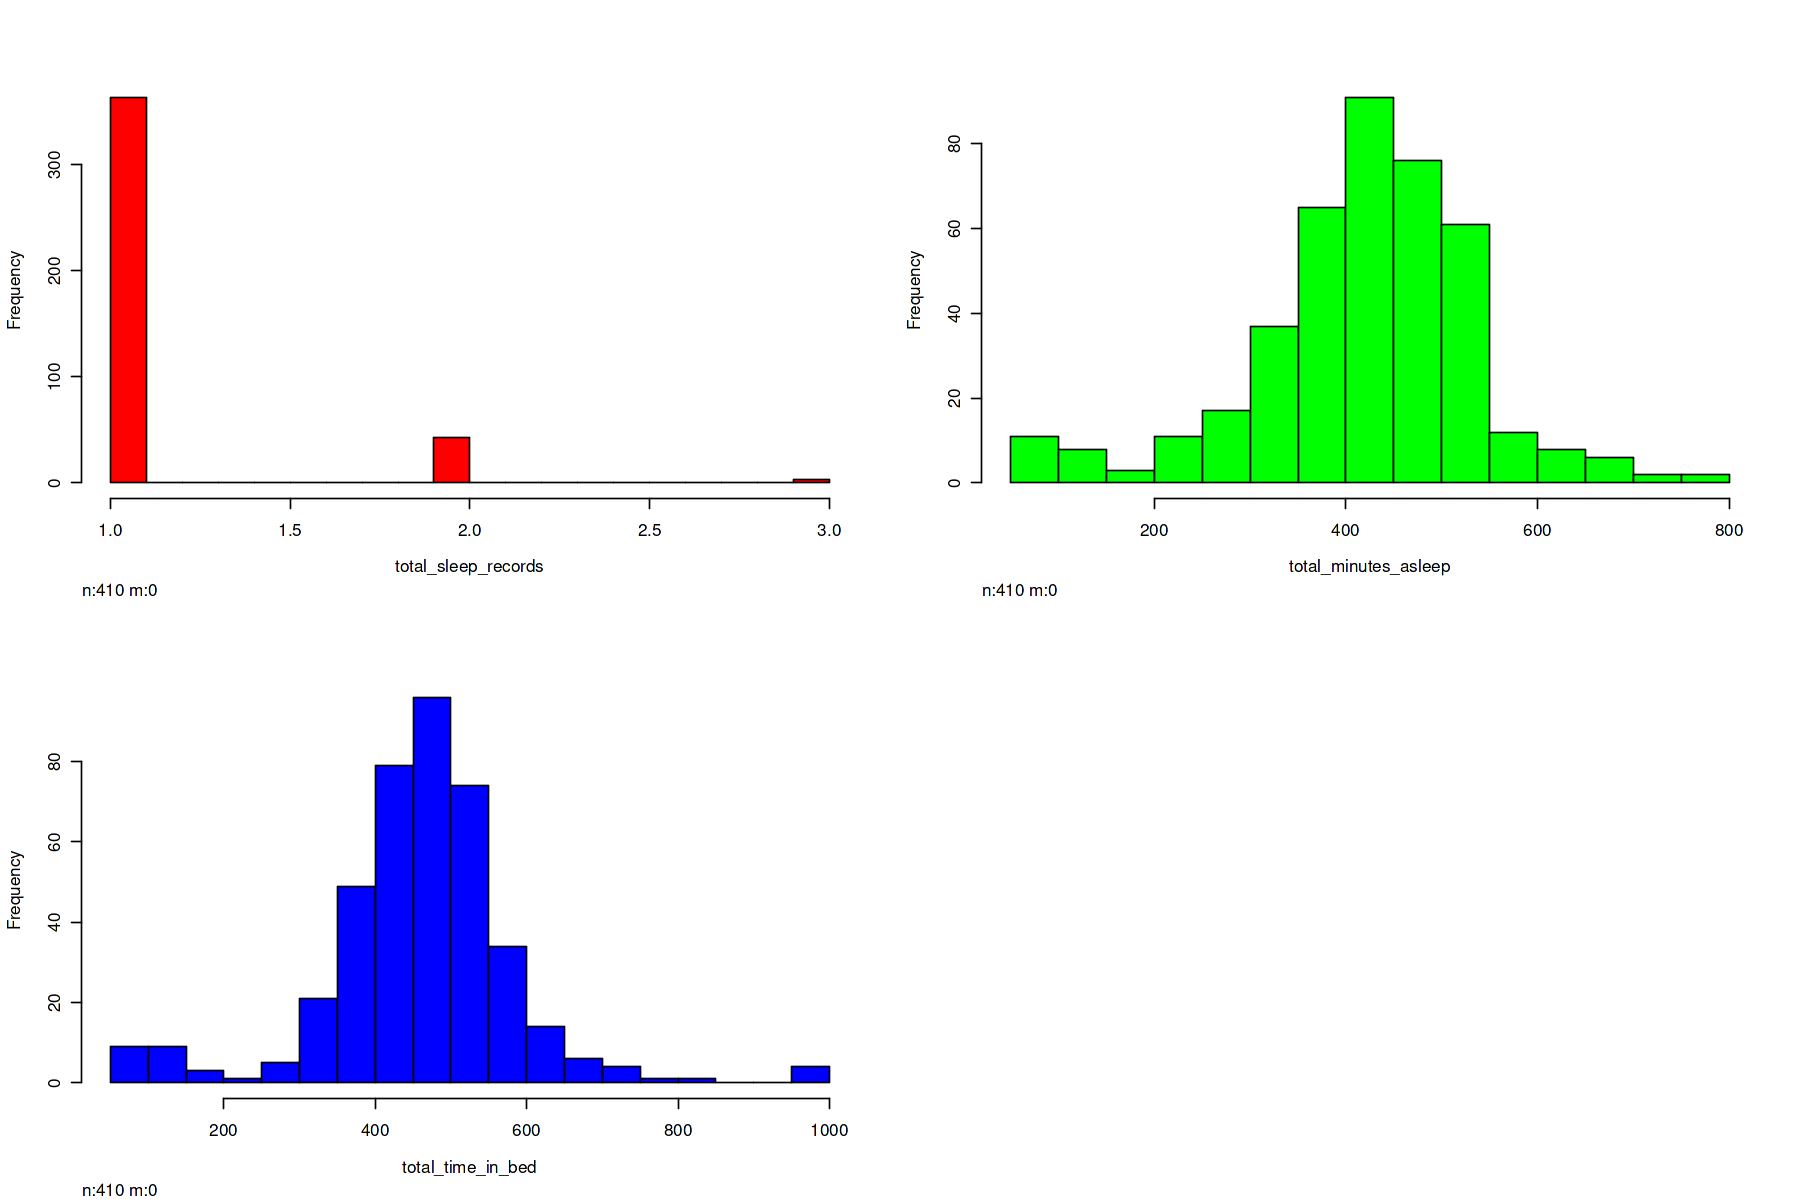

In [14]:
plot_size(15,10)
hist(sleep_data[,-c(1,2)])
cat('Sleep Data:')

Weight Data:

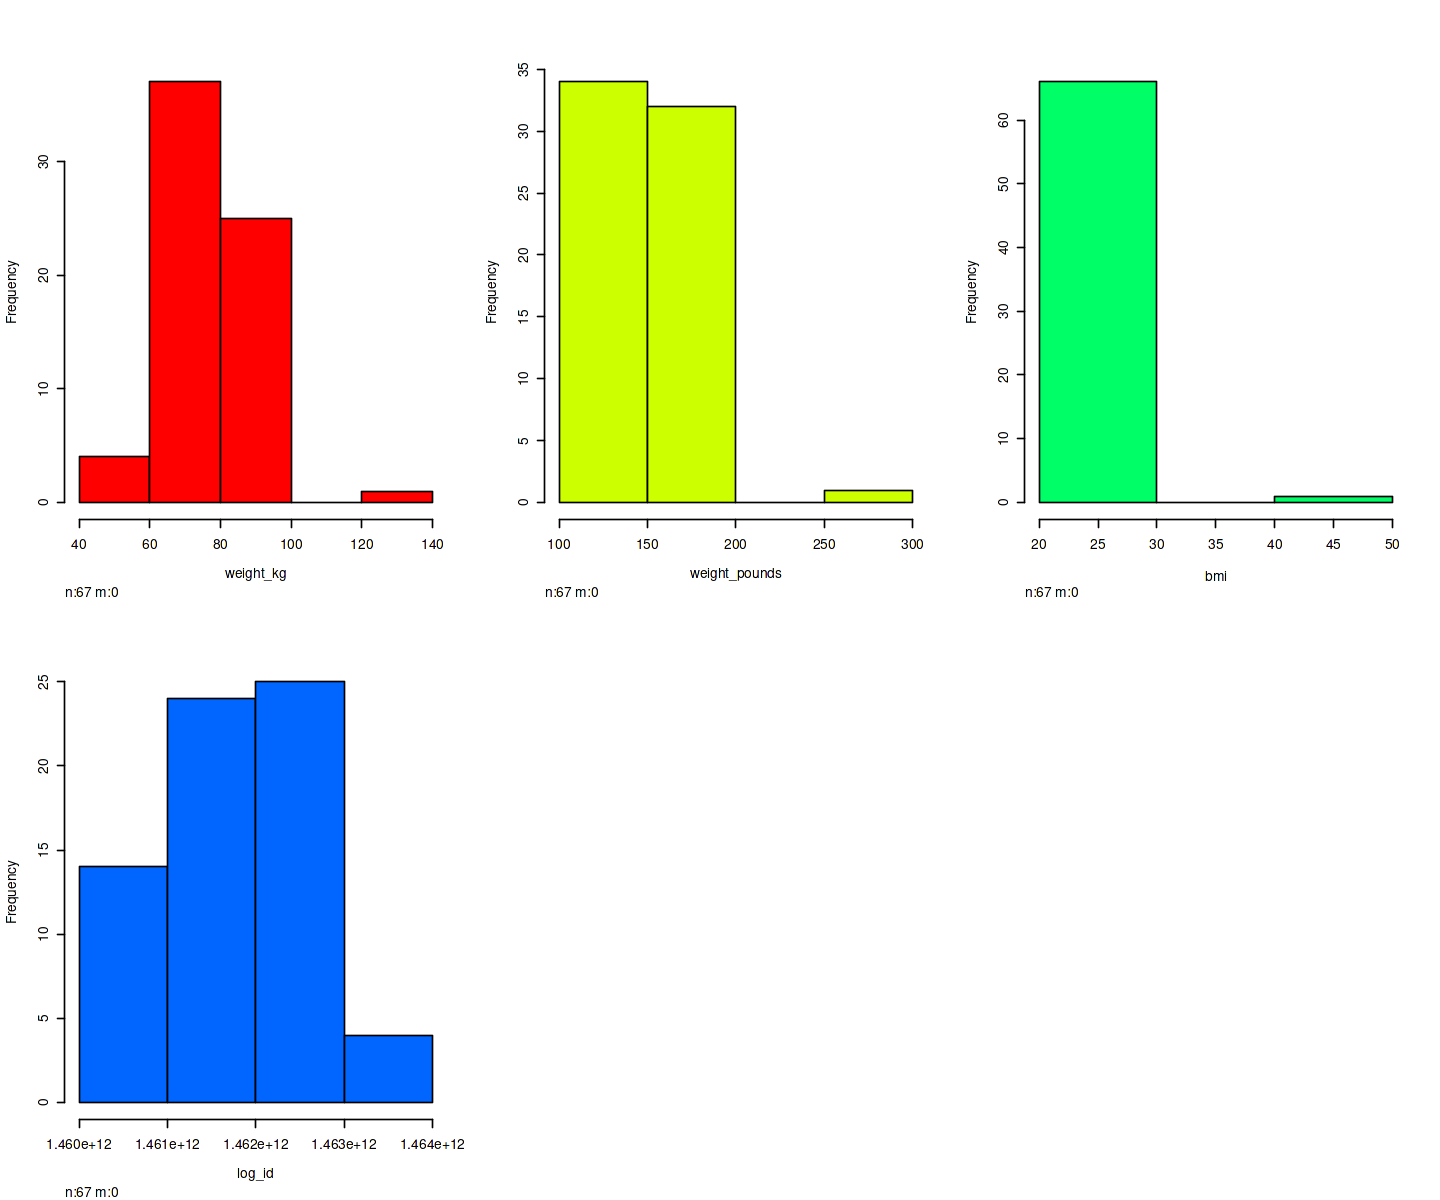

In [15]:
plot_size(12,10)
hist(weight_data[,-c(1,2)])
cat('Weight Data:')

Heart Rate Data:

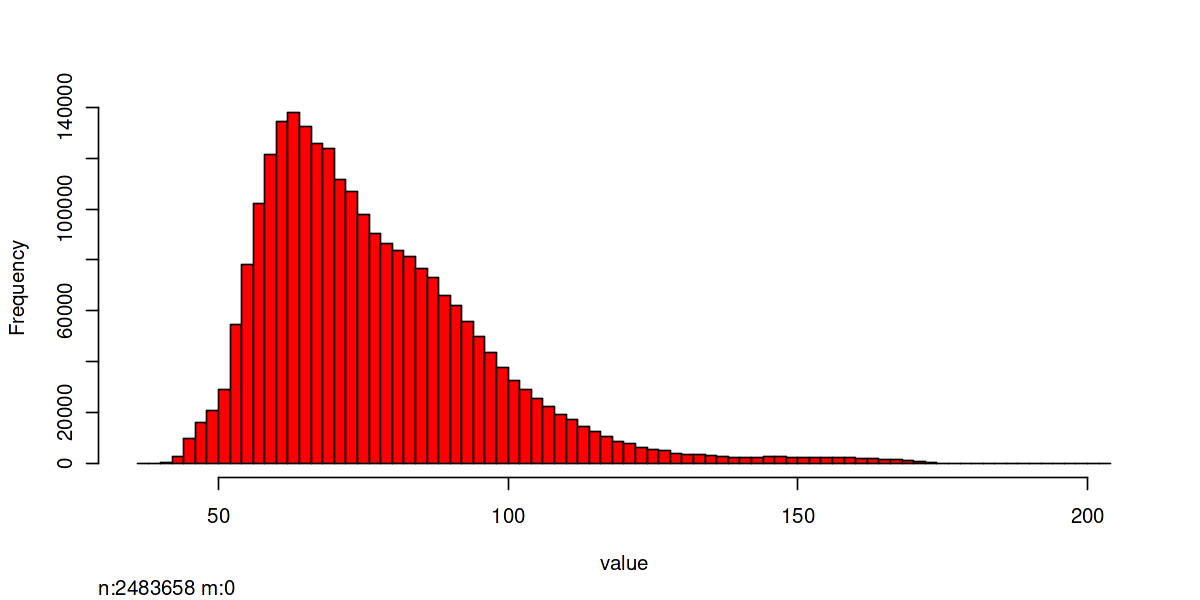

In [71]:
plot_size(10,5)
hist(hr_data[,-c(1,2)])
cat('Heart Rate Data:')

The following object is masked from daily_data:

    id


The following object is masked from sleep_data:

    id


The following object is masked from daily_data:

    id


The following object is masked from weight_data:

    id


The following object is masked from sleep_data:

    id


The following object is masked from daily_data:

    id




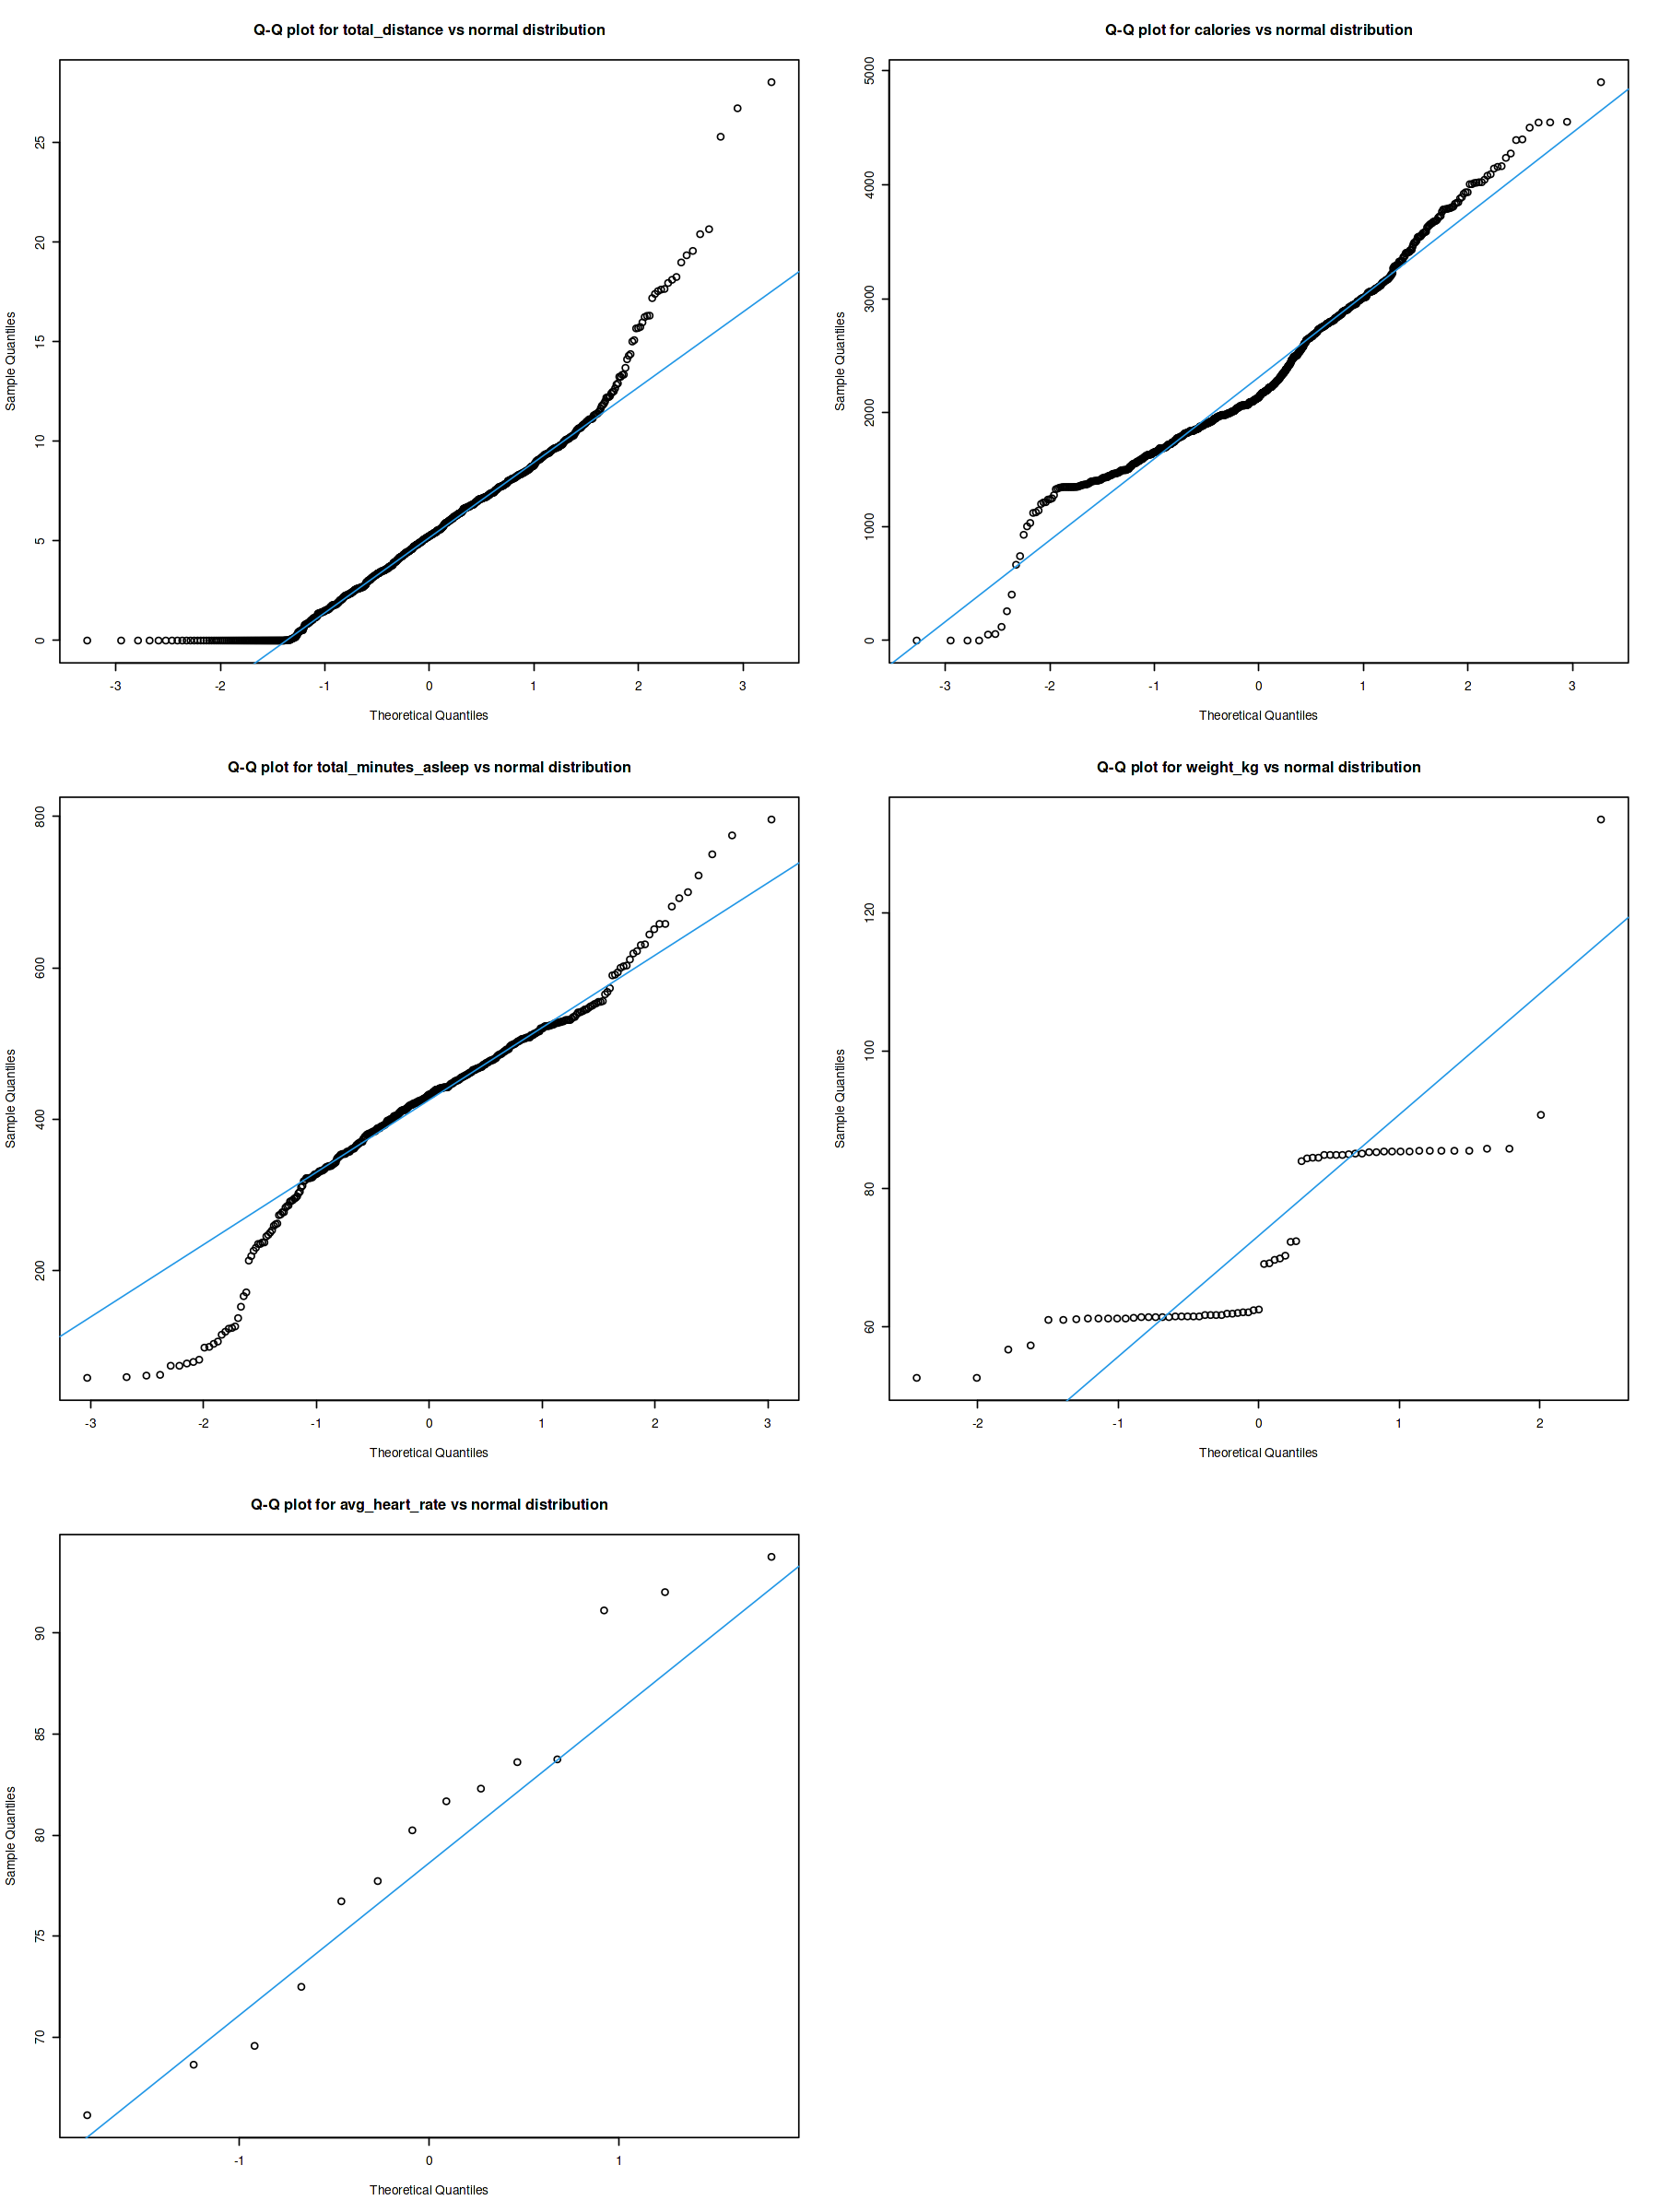

In [16]:
attach(daily_data)
attach(sleep_data)
attach(weight_data)
attach(hr_data)

plot_size(15,20)
par(mfrow=c(3,2))

qqnorm(total_distance, main='Q-Q plot for total_distance vs normal distribution')
qqline(total_distance, col=4)
#
qqnorm(calories, main='Q-Q plot for calories vs normal distribution')
qqline(calories, col=4)
#
qqnorm(total_minutes_asleep, main='Q-Q plot for total_minutes_asleep vs normal distribution')
qqline(total_minutes_asleep, col=4)
#
qqnorm(weight_kg, main='Q-Q plot for weight_kg vs normal distribution')
qqline(weight_kg, col=4)
#
avg_heart_rate <- hr_data %>%
group_by(id) %>%
summarise(avg=mean(value))
qqnorm(avg_heart_rate$avg, main='Q-Q plot for avg_heart_rate vs normal distribution')
qqline(avg_heart_rate$avg, col=4)

In [17]:
# Calculate the best estimate for the population mean 
t.test(total_distance, mu=5, conf.level=.99)
t.test(calories, mu=2000, conf.level=.99)
t.test(total_minutes_asleep, mu=410, conf.level=.99)
t.test(weight_kg, alternative='greater', mu=70, conf.level=.99)


	One Sample t-test

data:  total_distance
t = 3.8256, df = 939, p-value = 0.0001391
alternative hypothesis: true mean is not equal to 5
99 percent confidence interval:
 5.159308 5.820097
sample estimates:
mean of x 
 5.489702 



	One Sample t-test

data:  calories
t = 12.961, df = 939, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 2000
99 percent confidence interval:
 2243.150 2364.069
sample estimates:
mean of x 
  2303.61 



	One Sample t-test

data:  total_minutes_asleep
t = 1.5657, df = 409, p-value = 0.1182
alternative hypothesis: true mean is not equal to 410
99 percent confidence interval:
 404.0106 434.3357
sample estimates:
mean of x 
 419.1732 



	One Sample t-test

data:  weight_kg
t = 1.1968, df = 66, p-value = 0.1178
alternative hypothesis: true mean is greater than 70
99 percent confidence interval:
 67.98034      Inf
sample estimates:
mean of x 
 72.03582 


From the histograms, it looks like that total_distance and tracker_distance are very similar. We inspect this in the next block.

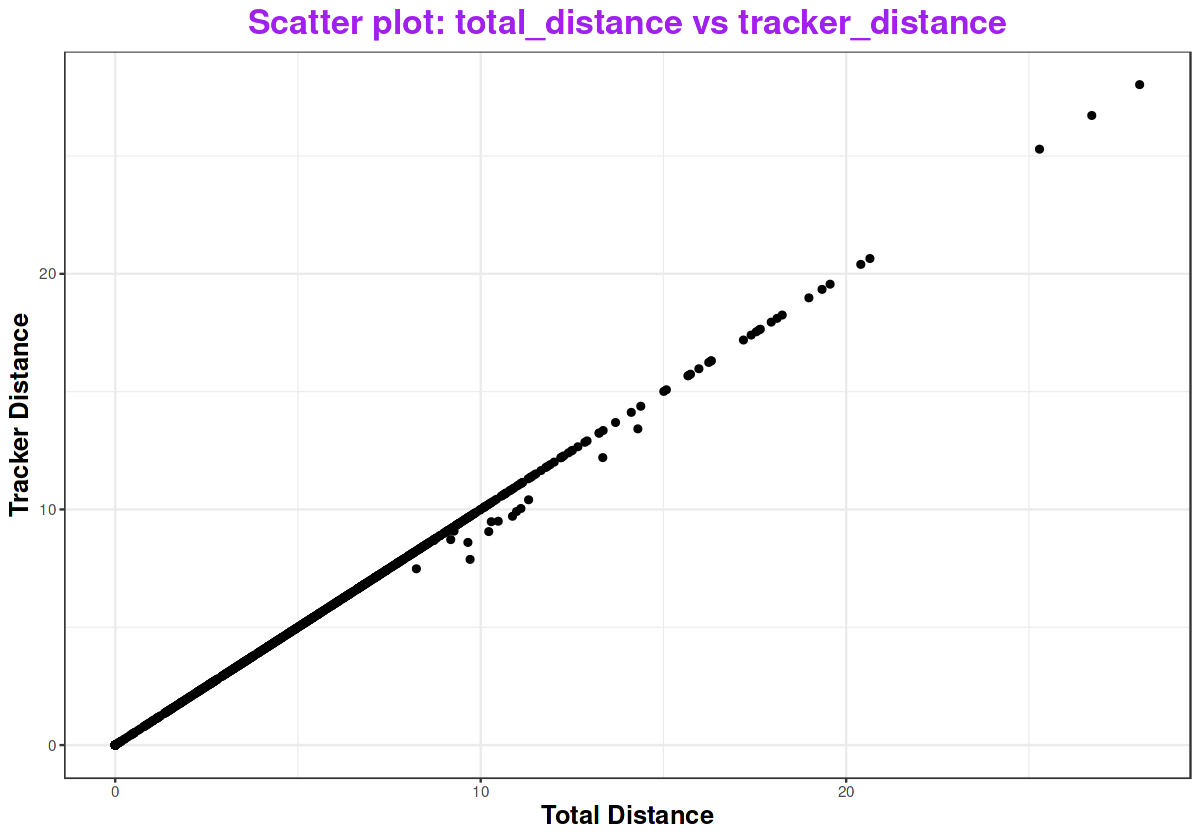

In [18]:
# Inspect with visualization
plot_size(10,7)
ggplot(daily_data) + 
geom_point(aes(x=total_distance, y=tracker_distance)) + 
labs(x='Total Distance', y='Tracker Distance') +
ggtitle("Scatter plot: total_distance vs tracker_distance") +
theme_bw() +
theme(axis.title.x = element_text(size = 15, face = "bold", color='black', hjust = 0.5),
      axis.title.y = element_text(size = 15, face = "bold", color='black', hjust = 0.5),
      plot.title = element_text(size=20, face='bold', color='purple', hjust=0.5))

#### Possible explanation:

The total distance is the real distance and the tracker distance is the distance calculated by the smart tracker. It seems that the tracker, almost perfectly, calculates the total distance. In few cases, the tracker distance is less than the actual distance. One reason is the user was not wearing the tracker or the user's activity was not captured by the tracker for some reasons such as users location, etc. 

Push notifications and reminders might be helpful to remind users of wearing the tracker properly.

In [19]:
df <- daily_data %>%
select(id, activity_date,total_distance) %>%
group_by(id) %>%
summarise(num_days=n_distinct(activity_date),
          average_distance=mean(total_distance))

head(df)
summary(df)

id,num_days,average_distance
<dbl>,<int>,<dbl>
1503960366,31,7.8096774
1624580081,31,3.9148387
1644430081,30,5.2953334
1844505072,31,1.7061290
1927972279,31,0.6345161
2022484408,31,8.0841935


       id               num_days     average_distance 
 Min.   :1.504e+09   Min.   : 4.00   Min.   : 0.6345  
 1st Qu.:2.347e+09   1st Qu.:29.00   1st Qu.: 3.4548  
 Median :4.445e+09   Median :31.00   Median : 5.2953  
 Mean   :4.857e+09   Mean   :28.48   Mean   : 5.3990  
 3rd Qu.:6.962e+09   3rd Qu.:31.00   3rd Qu.: 6.9135  
 Max.   :8.878e+09   Max.   :31.00   Max.   :13.2129  

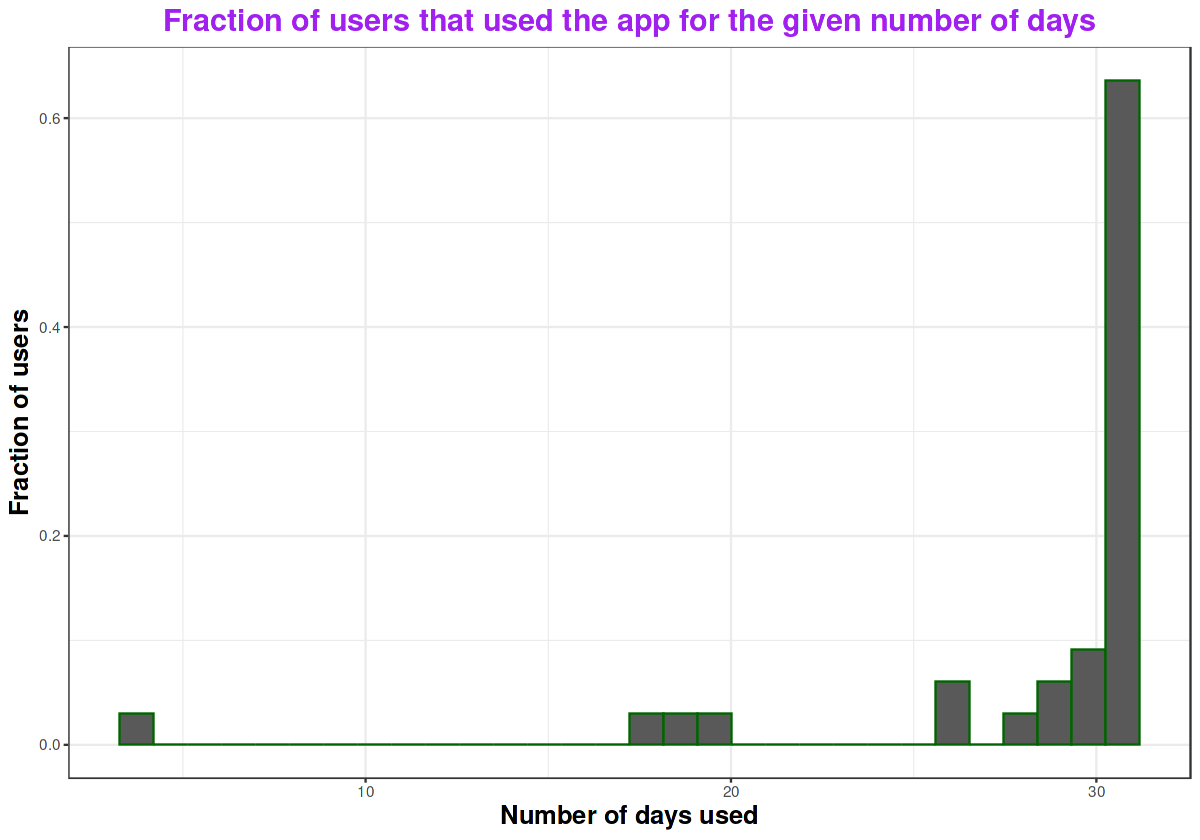

In [20]:
# Create a probability histogram
plot_size(10,7)
ggplot(df) + 
geom_histogram(aes(x=num_days, y=after_stat(count/sum(count))), color='darkgreen', bins=30) +
labs(x='Number of days used', y='Fraction of users') +
ggtitle("Fraction of users that used the app for the given number of days" ) +
theme_bw() +
theme(axis.title.x = element_text(size = 15, face = "bold", color='black', hjust = 0.5),
      axis.title.y = element_text(size = 15, face = "bold", color='black', hjust = 0.5),
      plot.title = element_text(size=18, face='bold', color='purple', hjust=0.5))

Most users have been using the app for the entire month. There are certain users, though, who stopped their participation after a specific day, so no data from their activity is available. It's important to keep users motivated.

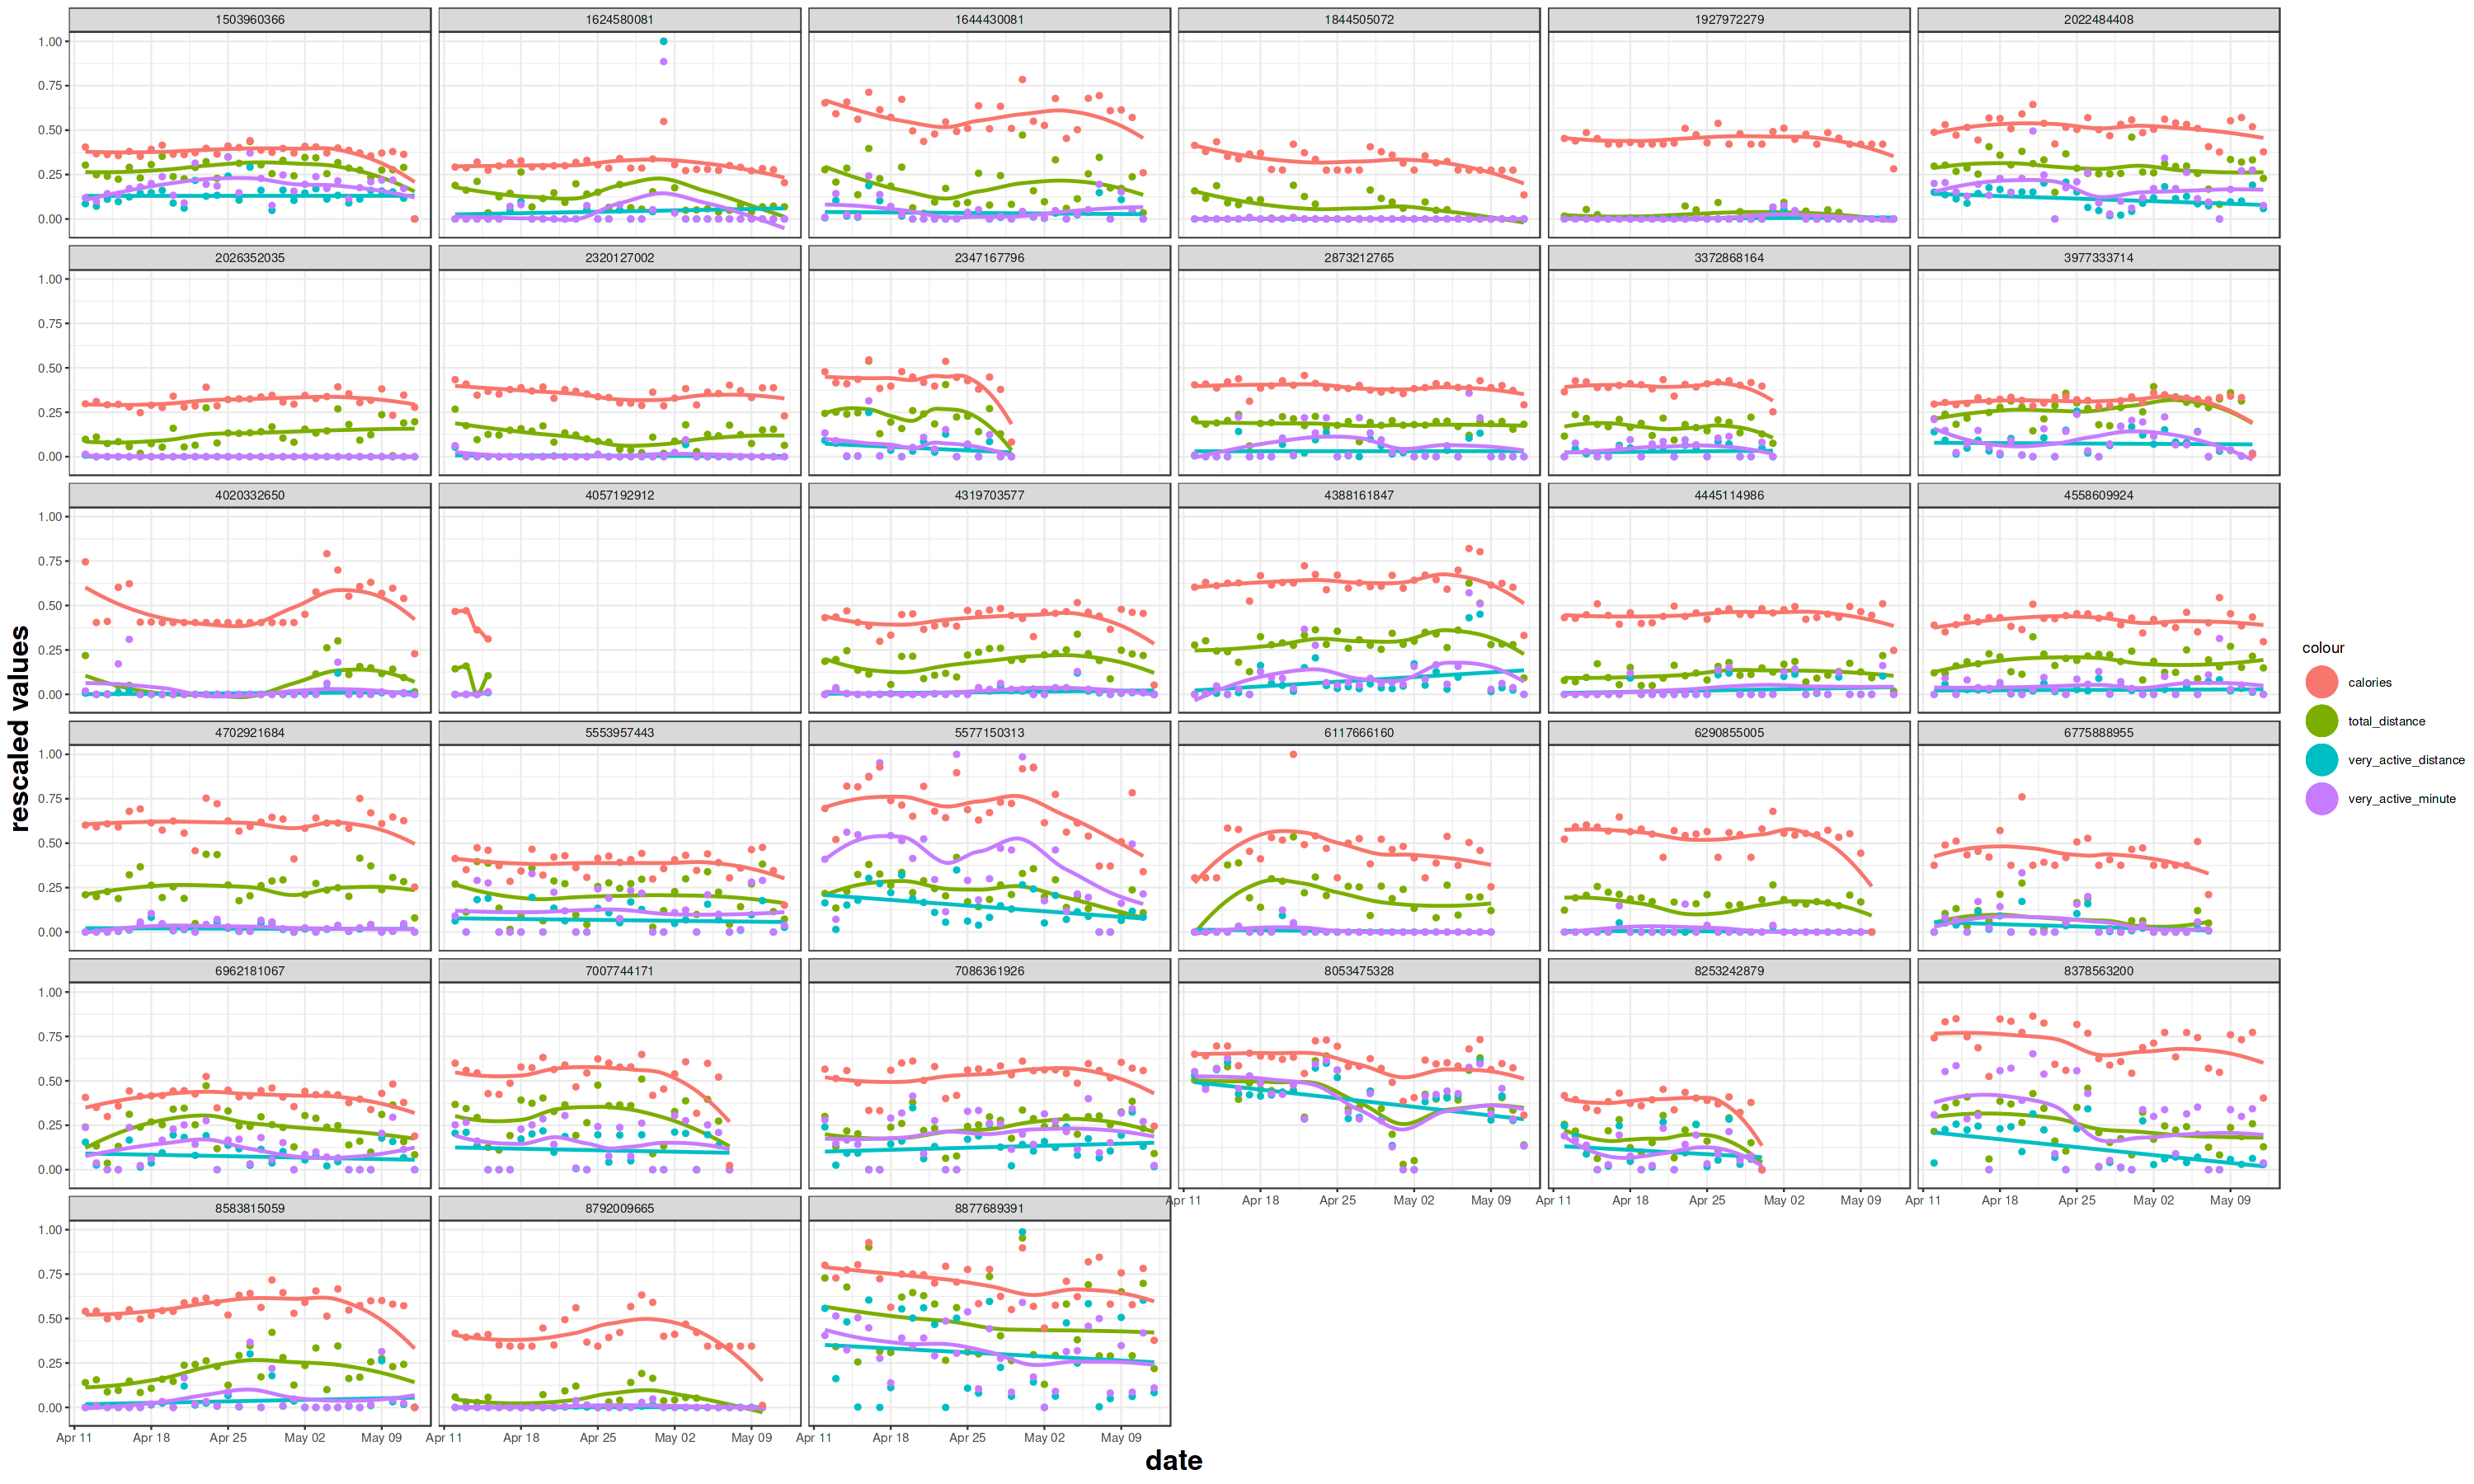

In [22]:
# min_max function to rescale columns for better comparison
min_max <- function(x){
  (x - min(x, na.rm = TRUE)) / (max(x, na.rm = TRUE) - min(x, na.rm = TRUE))
}

# Check the relation of the columns
plot_size(25,15)
ggplot(daily_data, aes(x = activity_date, y = min_max(total_distance), col = 'total_distance')) +
geom_point() +
geom_smooth(se = FALSE, method = 'loess', formula = y ~ x) +
geom_point(aes(y = min_max(very_active_distance), col = 'very_active_distance')) +
geom_smooth(aes(y = min_max(very_active_distance), col = 'very_active_distance'), se = FALSE, method = 'lm', formula = y ~ x) +
geom_point(aes(y = min_max(very_active_minutes), col = 'very_active_minute')) +
geom_smooth(aes(y = min_max(very_active_minutes), col = 'very_active_minute'), se = FALSE, method = 'loess', formula = y ~ x) +
geom_point(aes(y = min_max(calories), col = 'calories')) +
geom_smooth(aes(y = min_max(calories), col = 'calories'), se = FALSE, method = 'loess', formula = y ~ x) +
guides(color = guide_legend(override.aes = list(size = 10))) +
facet_wrap(~id) +
labs(x = 'date', y = 'rescaled values') +
theme_bw() +
theme(axis.title.x = element_text(size = 20, face = "bold", color='black', hjust = 0.5),
      axis.title.y = element_text(size = 20, face = "bold", color='black', hjust = 0.5))


The plots show a clear relation between total_distance (green curve) and calories (red curve) data for all users separately. Moreover, very_active distance and very_active minutes also follow the same trend. 

A few users, show unusual activities as they have decided to run for much longer (or less) distance in a specific day, but mostly show a consistent running throught the month (less variation in data).

Using  as id variables



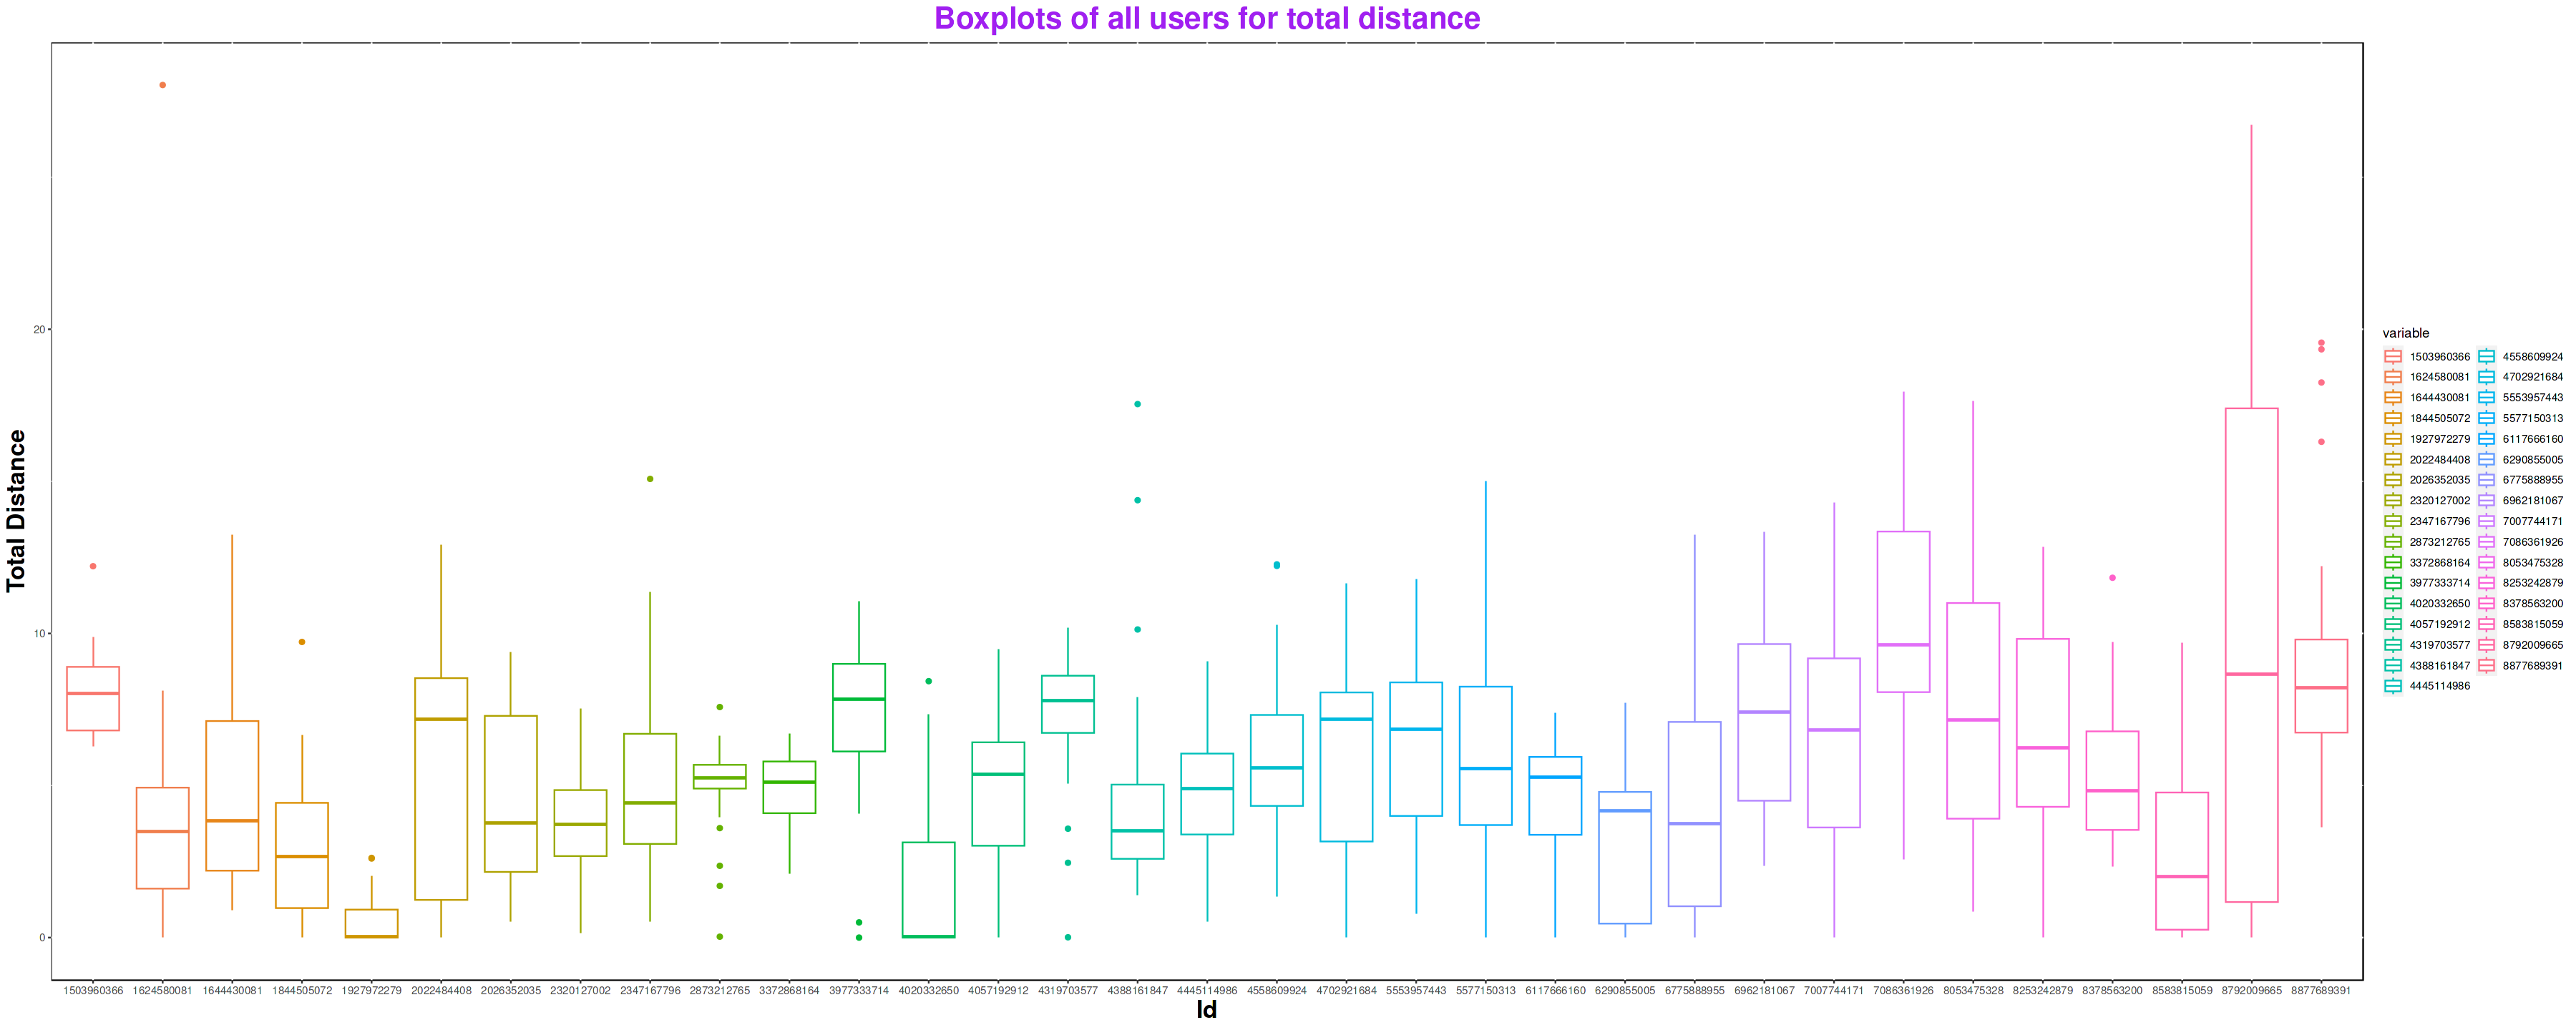

In [23]:
ids <- unique(daily_data$id)

lists = list()
for (i in seq_along(ids)) {
    lists[[i]] <- daily_data %>%
    select(id, total_distance) %>%
    filter(id==ids[i]) %>%
    select(total_distance)
}

df <- data.frame(matrix(unlist(lists), ncol = length(lists)))
colnames(df) <- ids
df <- melt(df)

plot_size(30,12)
ggplot(df, aes(x=variable, y=value, color=variable)) + 
geom_boxplot() + 
ggtitle("Boxplots of all users for total distance") +
xlab("Id") +
ylab("Total Distance") +
 theme(panel.background = element_rect(fill = "white", colour = "black",
                                       size = 0.5, linetype = "solid"))+
theme(
    plot.title = element_text(face = "bold", size = 25, color='purple', hjust = 0.5),
    axis.title.x = element_text(face = "bold", size = 20, color = "black", hjust=0.5),
    axis.title.y = element_text(face = "bold", size = 20, color = "black", hjust=0.5)
  )

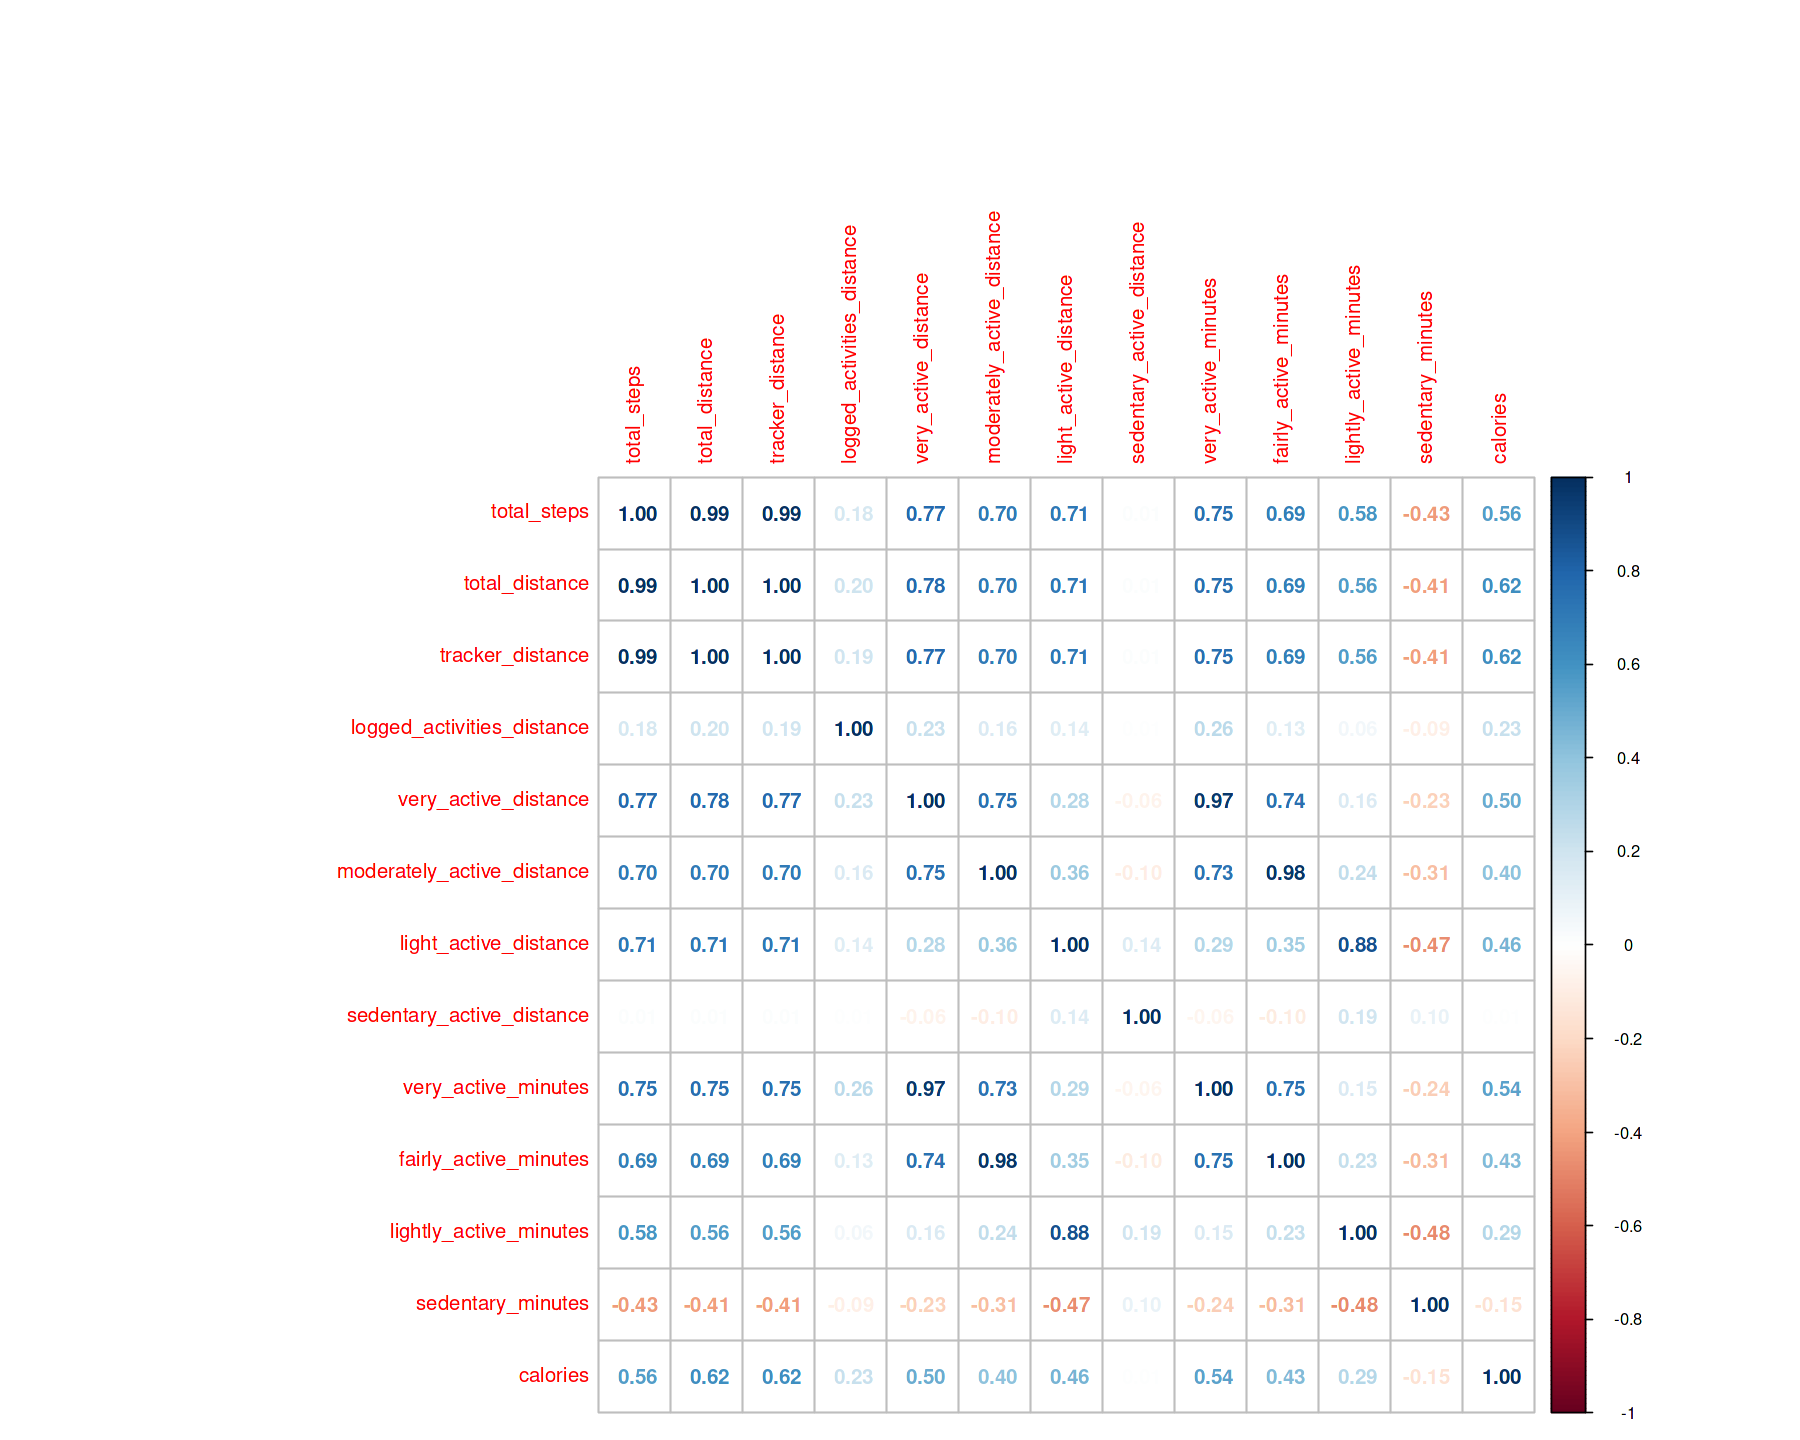

In [24]:
# Create a correlation plot
plot_size(15,12)
corr_matrix <- cor(daily_data[,-c(1,2)], method='spearman')
corrplot(corr_matrix, method='number')

In [25]:
# Create a function for scatterplot and fitting curves
simple_ggplot <- function(data, col1, col2){
    ggplot(data) + 
    geom_point(aes_string(x=col1, y=col2),col='darkgreen') + 
    geom_smooth(aes_string(x=col1, y=col2), col='orange', formula=y~x, method="loess") +
    xlab(col1) +
    ylab(col2) +
    theme_bw() +
    theme(axis.title.x = element_text(face = "bold", size = 16, color = "black"),
          axis.title.y = element_text(face = "bold", size = 16, color = "black")
         )
}

In [26]:
detach("package:reshape", unload=TRUE)

# Rename date columns to a common name
daily_data <- rename(daily_data, day = activity_date)
sleep_data <- rename(sleep_data, day = sleep_day)

# Inner join two dataframes 
daily_sleep_merged <- merge(daily_data, sleep_data, by=c('id', 'day'))

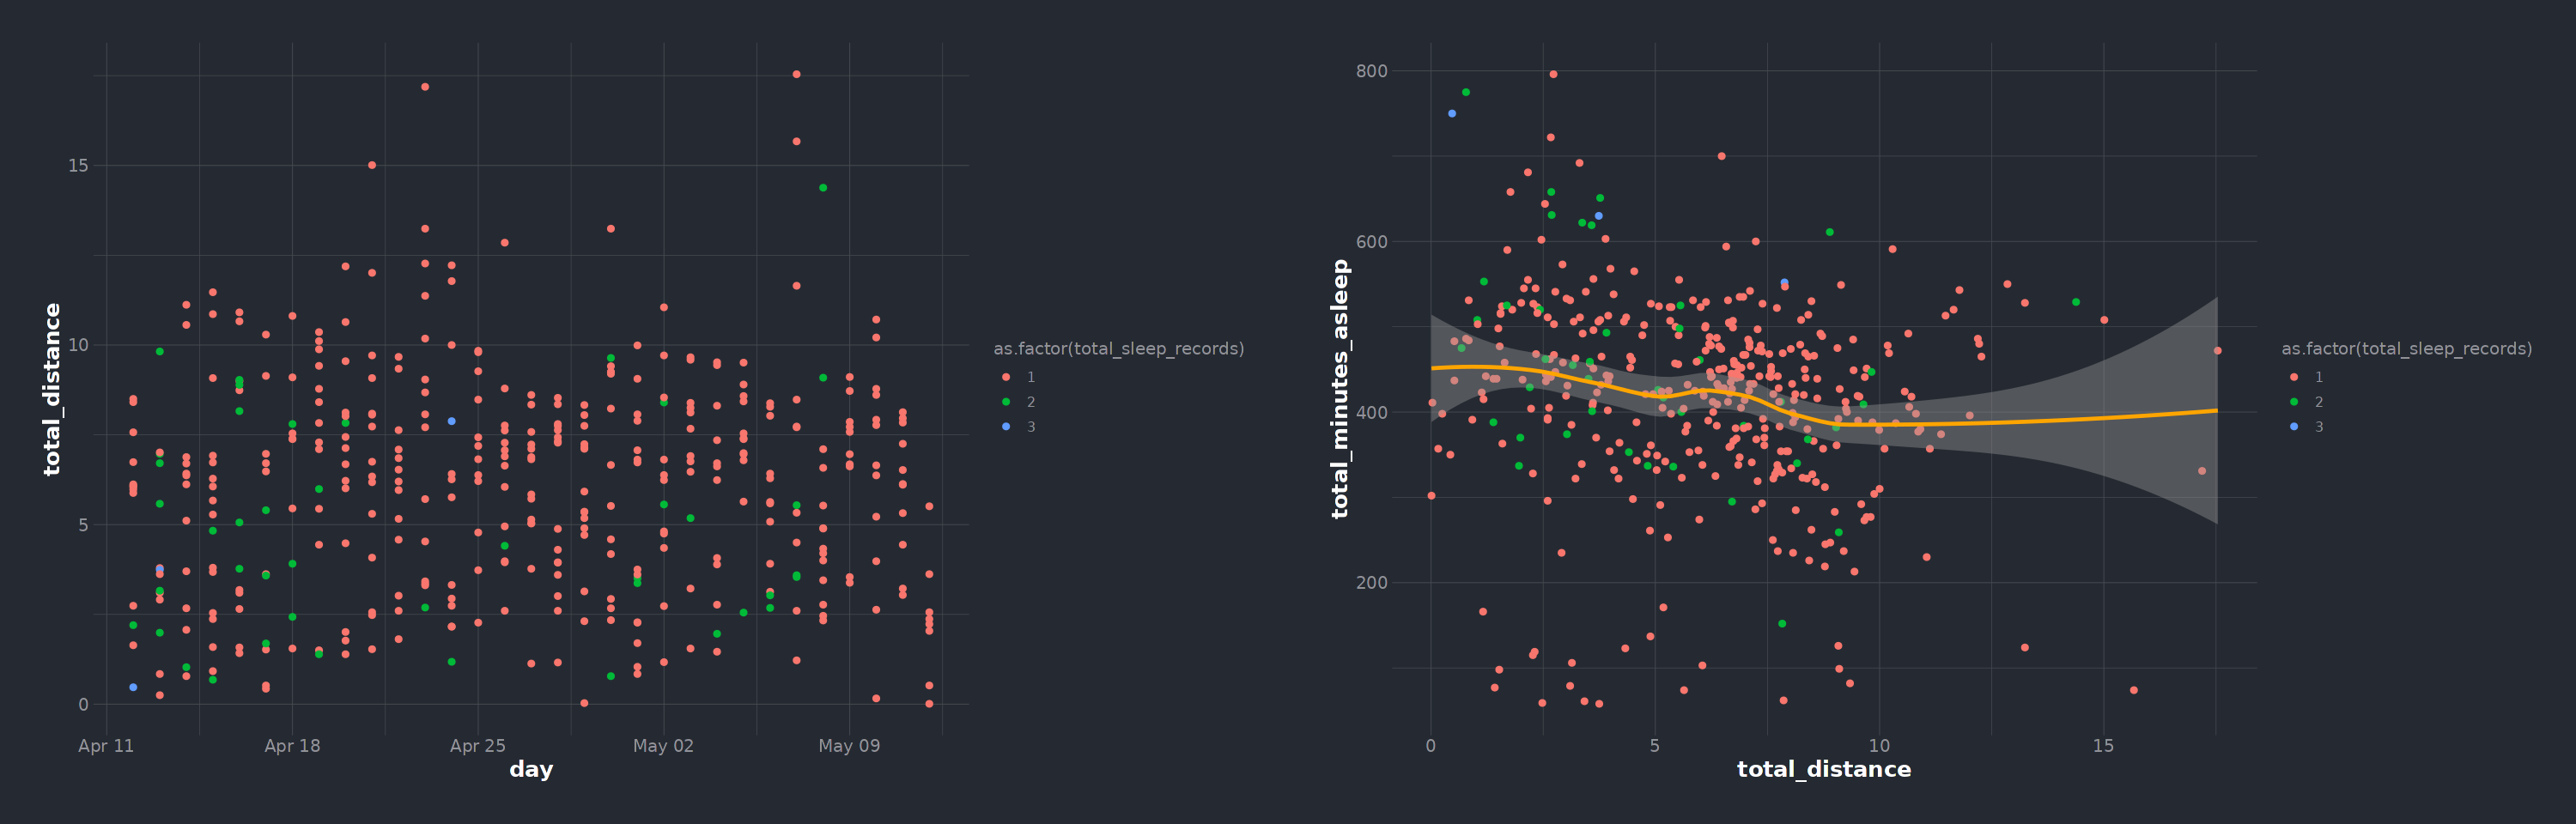

In [27]:
plot_size(25,8)
p1 <- ggplot(daily_sleep_merged) + 
geom_point(aes(x=day, y=total_distance, color=as.factor(total_sleep_records))) +
theme_ft_rc() +
theme(axis.title.x = element_text(size = 15, face = "bold", color='white', hjust = 0.5),
      axis.title.y = element_text(size = 15, face = "bold", color='white', hjust = 0.5))

p2 <- ggplot(daily_sleep_merged) + 
geom_point(aes(x=total_distance, y=total_minutes_asleep, color=as.factor(total_sleep_records))) +
geom_smooth(aes(x=total_distance, y=total_minutes_asleep), color='orange', method = 'loess', formula = 'y ~ x') +
theme_ft_rc() +
theme(axis.title.x = element_text(size = 15, face = "bold", color='white', hjust = 0.5),
      axis.title.y = element_text(size = 15, face = "bold", color='white', hjust = 0.5))

grid.arrange(p1, p2, ncol = 2)

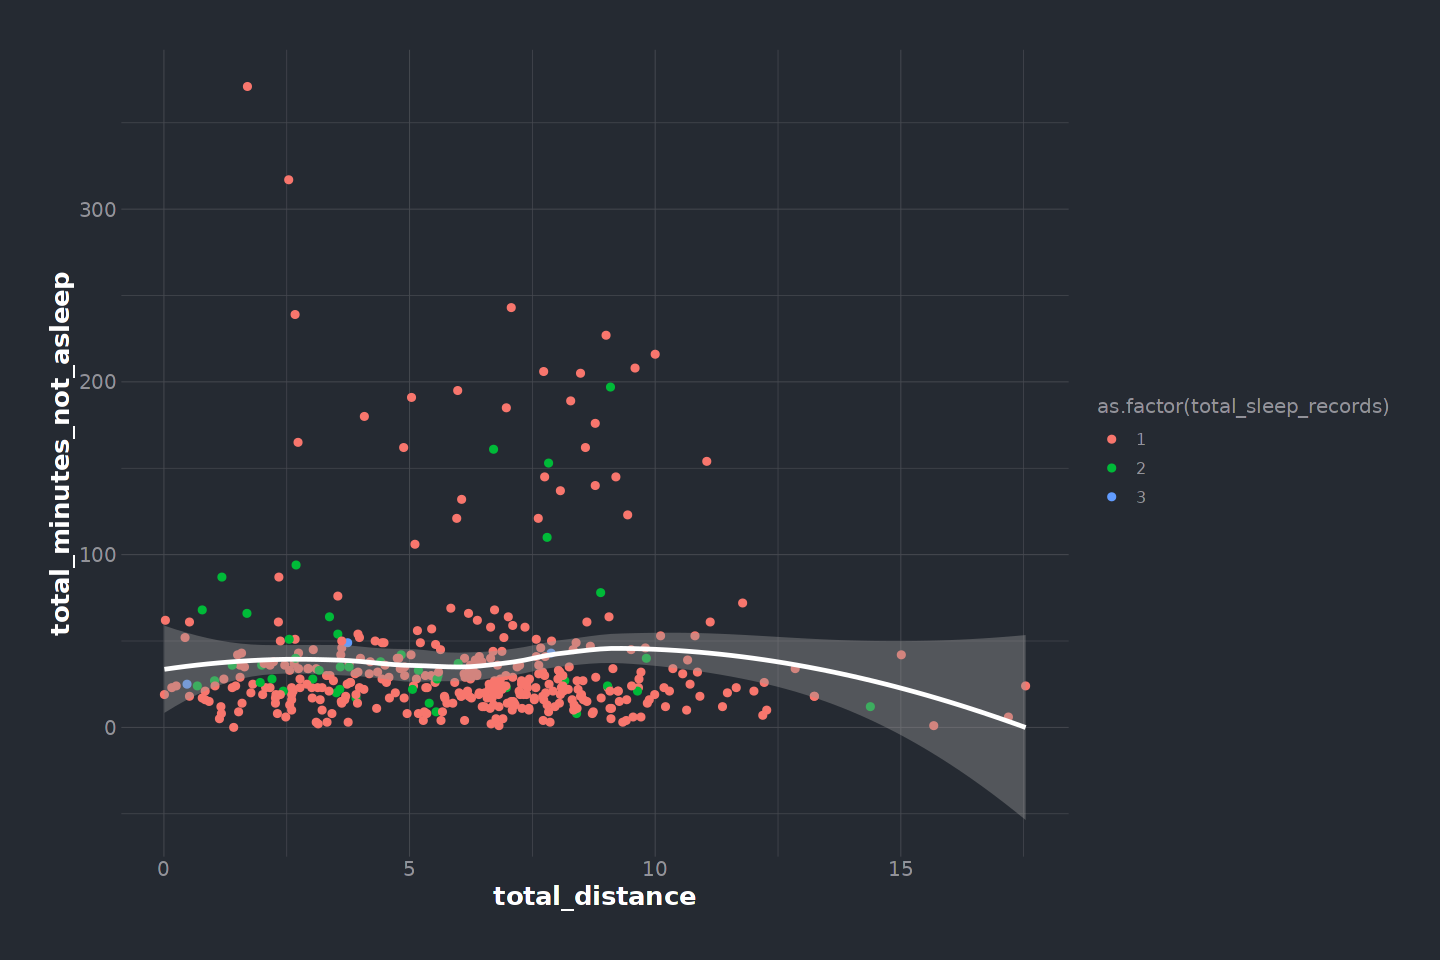

In [28]:
# Create a column for total minutes not sleeping while in bed
daily_sleep_merged$total_minutes_not_asleep = daily_sleep_merged$total_time_in_bed - daily_sleep_merged$total_minutes_asleep

# Chck the relation between total_distance and total minutes users couldn't sleep in bed
plot_size(12,8)
ggplot(daily_sleep_merged) + 
geom_point(aes(x=total_distance, y=total_minutes_not_asleep, color=as.factor(total_sleep_records))) +
geom_smooth(aes(x=total_distance, y=total_minutes_not_asleep), color='white', method = 'loess', formula = 'y ~ x') +
theme_ft_rc() +
theme(axis.title.x = element_text(size = 15, face = "bold", color='white', hjust = 0.5),
      axis.title.y = element_text(size = 15, face = "bold", color='white', hjust = 0.5))


In [29]:
hr_data$day <- strftime(hr_data$time, format="%Y-%m-%d")

glimpse(hr_data)

Rows: 2,483,658
Columns: 4
$ id    <dbl> 2022484408, 2022484408, 2022484408, 2022484408, 2022484408, 2022…
$ time  <dttm> 2016-04-12 07:21:00, 2016-04-12 07:21:05, 2016-04-12 07:21:10, …
$ value <dbl> 97, 102, 105, 103, 101, 95, 91, 93, 94, 93, 92, 89, 83, 61, 60, …
$ day   <chr> "2016-04-12", "2016-04-12", "2016-04-12", "2016-04-12", "2016-04…


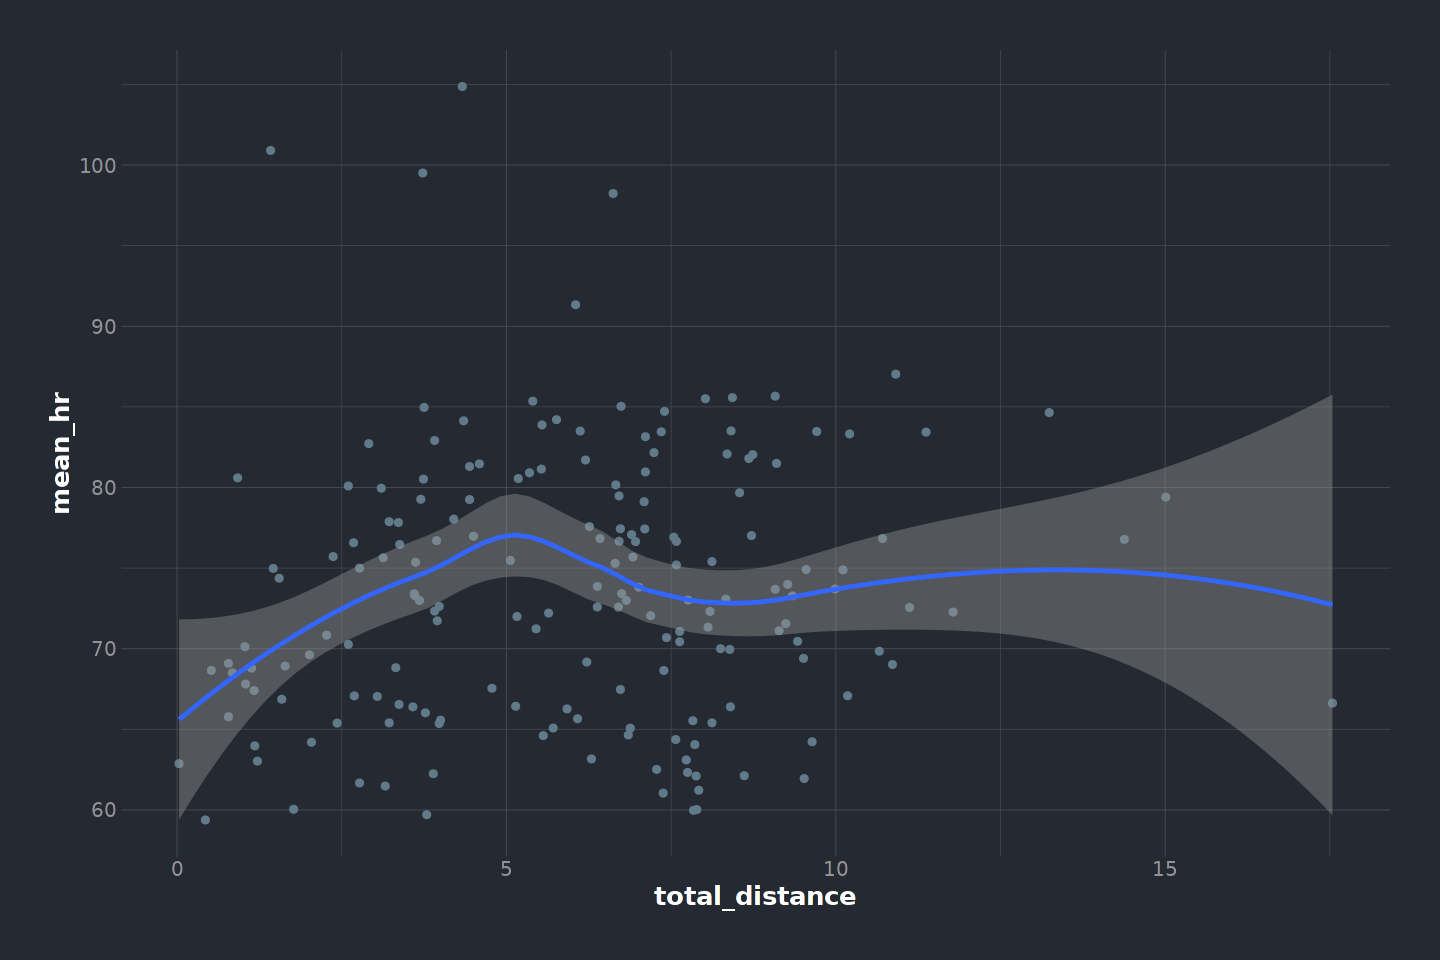

In [30]:
average_hr_data <- hr_data %>%
group_by(id, day) %>%
summarise(mean_hr=mean(value))

daily_sleep_hr_merged <- merge(daily_sleep_merged, average_hr_data, c('id', 'day'))


ggplot(daily_sleep_hr_merged) + 
geom_point(aes(x=total_distance, y=mean_hr)) + 
geom_smooth(aes(x=total_distance, y=mean_hr), method='loess', formula='y~x') + 
theme_ft_rc() +
theme(axis.title.x = element_text(size = 15, face = "bold", color='white', hjust = 0.5),
      axis.title.y = element_text(size = 15, face = "bold", color='white', hjust = 0.5))